In [104]:
import os
import email 
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [122]:
# All functions will be defined here

def parse_email(dir, fname):
    with open(os.path.join(dir, fname), 'rb') as m:
        return email.parser.BytesParser().parse(m)
    
def get_struct(mail): # get emails structures
    payload = mail.get_payload()
    structs = []
    if isinstance(payload, list):
        for msg in payload:
            structs.append(get_struct(msg))
        return f'Multipart({structs})'
    else:
        return mail.get_content_type()
    
def structs_counter(mails):
    cnt = Counter()
    for mail in mails:
        struct = get_struct(mail)
        cnt[struct] += 1

    return cnt

def draw_word_cloud(structs):
    word_cloud = WordCloud(width=1600, height=800)
    word_cloud.generate_from_frequencies(frequencies=structs)

    plt.figure(figsize=(20,10), facecolor='k')
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.tight_layout(pad=0)
    plt.axis('off')
    plt.show()

In [78]:
ham_fnames = [mail for mail in os.listdir('/media/elneklawy/extra/emails/main_ham')]
spam_fnames = [mail for mail in os.listdir('/media/elneklawy/extra/emails/main_spam')]

In [79]:
ham_dir = '/media/elneklawy/extra/emails/main_ham'
spam_dir = '/media/elneklawy/extra/emails/main_spam'

hams = [parse_email(ham_dir, mail) for mail in ham_fnames]
spams = [parse_email(spam_dir, mail) for mail in spam_fnames]

In [80]:
print(f'Number of ham emails: {len(hams)}\nNumber of spam emails: {len(spams)}\nSpam ratio: {round(len(spams)/(len(spams)+len(hams)) * 100, 3)}%')

Number of ham emails: 6951
Number of spam emails: 2398
Spam ratio: 25.65%


In [81]:
tst_email = hams[0]
tst_email

In [82]:
print(f'Header names: {tst_email.keys()}\nField values: {tst_email.values()}\nContent: {tst_email.get_payload()}')

Header names: ['Return-Path', 'Delivered-To', 'Received', 'Received', 'Received', 'Received', 'Received', 'X-Authentication-Warning', 'Received', 'Received', 'Date', 'From', 'To', 'Subject', 'Message-Id', 'References', 'MIME-Version', 'Content-Type', 'Content-Disposition', 'User-Agent', 'In-Reply-To', 'Sender', 'Errors-To', 'X-Mailman-Version', 'Precedence', 'List-Id', 'X-Beenthere']
Field values: ['<ilug-admin@linux.ie>', 'zzzz@localhost.netnoteinc.com', 'from localhost (localhost [127.0.0.1])\n\tby phobos.labs.netnoteinc.com (Postfix) with ESMTP id 8E6C243F99\n\tfor <zzzz@localhost>; Wed, 28 Aug 2002 05:47:23 -0400 (EDT)', 'from phobos [127.0.0.1]\n\tby localhost with IMAP (fetchmail-5.9.0)\n\tfor zzzz@localhost (single-drop); Wed, 28 Aug 2002 10:47:23 +0100 (IST)', 'from lugh.tuatha.org (root@lugh.tuatha.org [194.125.145.45]) by\n    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7RJaWZ22801 for\n    <zzzz-ilug@spamassassin.taint.org>; Tue, 27 Aug 2002 20:36:32 +0100', 'from lug

In [83]:
for mail in hams:
    if mail.is_multipart():
        multi_mail = mail
        break

print(multi_mail.get_payload(), multi_mail.get_payload()[0].get_payload(), multi_mail.get_payload()[1].get_payload(), sep='\n\n')

# The payload of a multipart email is a list of email.message.Message instances (non-leaf nodes).
# We need to traverse the tree of a multipart email upto its leaf node to get the actual content, the part contains.

[<email.message.Message object at 0x7f3445ed2680>, <email.message.Message object at 0x7f3445ed39d0>]

Made me chuckle.

http://www.bloggerheads.com/can_weblogs/ronald_scelson.asp

rOD.

--
"Don't frown, don't pout, don't snivel, don't cry,
 Don't cough, don't choke, don't faint, don't die."

>> Doing the blogging thang again at http://www.groovymother.com/ <<



MIAGCSqGSIb3DQEHAqCAMIACAQExCzAJBgUrDgMCGgUAMIAGCSqGSIb3DQEHAQAAoIIJIjCCAnow
ggHjoAMCAQICARcwDQYJKoZIhvcNAQEFBQAwUzELMAkGA1UEBhMCVVMxHDAaBgNVBAoTE0VxdWlm
YXggU2VjdXJlIEluYy4xJjAkBgNVBAMTHUVxdWlmYXggU2VjdXJlIGVCdXNpbmVzcyBDQS0xMB4X
DTAyMDQxODE1MjkzN1oXDTIwMDQxMzE1MjkzN1owTjELMAkGA1UEBhMCVVMxFjAUBgNVBAoTDUdl
b1RydXN0IEluYy4xJzAlBgNVBAMTHkdlb1RydXN0IFRydWUgQ3JlZGVudGlhbHMgQ0EgMjCBnzAN
BgkqhkiG9w0BAQEFAAOBjQAwgYkCgYEAspcspZISpYX/aJqWoYcSyyGqFby3OvsepRzLRU0ENDJR
wJo7DwFpirRFOUQkTkKXsY6BQzX/CeCRrn9i4ny5gcXuI2JSyrSmDwobbwl52n5cPEbHGcebybWd
KfAf8vvkxYUnTmDZPtt2ob5RNpJTeTiq9MpNCB/5G7Ocr1hEljcCAwEAAaNjMGEwDgYDVR0PAQH/
BAQDAgHGMB0GA1UdDgQ

In [84]:
tst_email.get_content_type(), multi_mail.get_content_type()

('text/plain', 'multipart/signed')

In [85]:
get_struct(multi_mail)

['text/plain', 'application/x-pkcs7-signature']

In [101]:
hams_structs = structs_counter(hams)
spams_structs = structs_counter(spams)

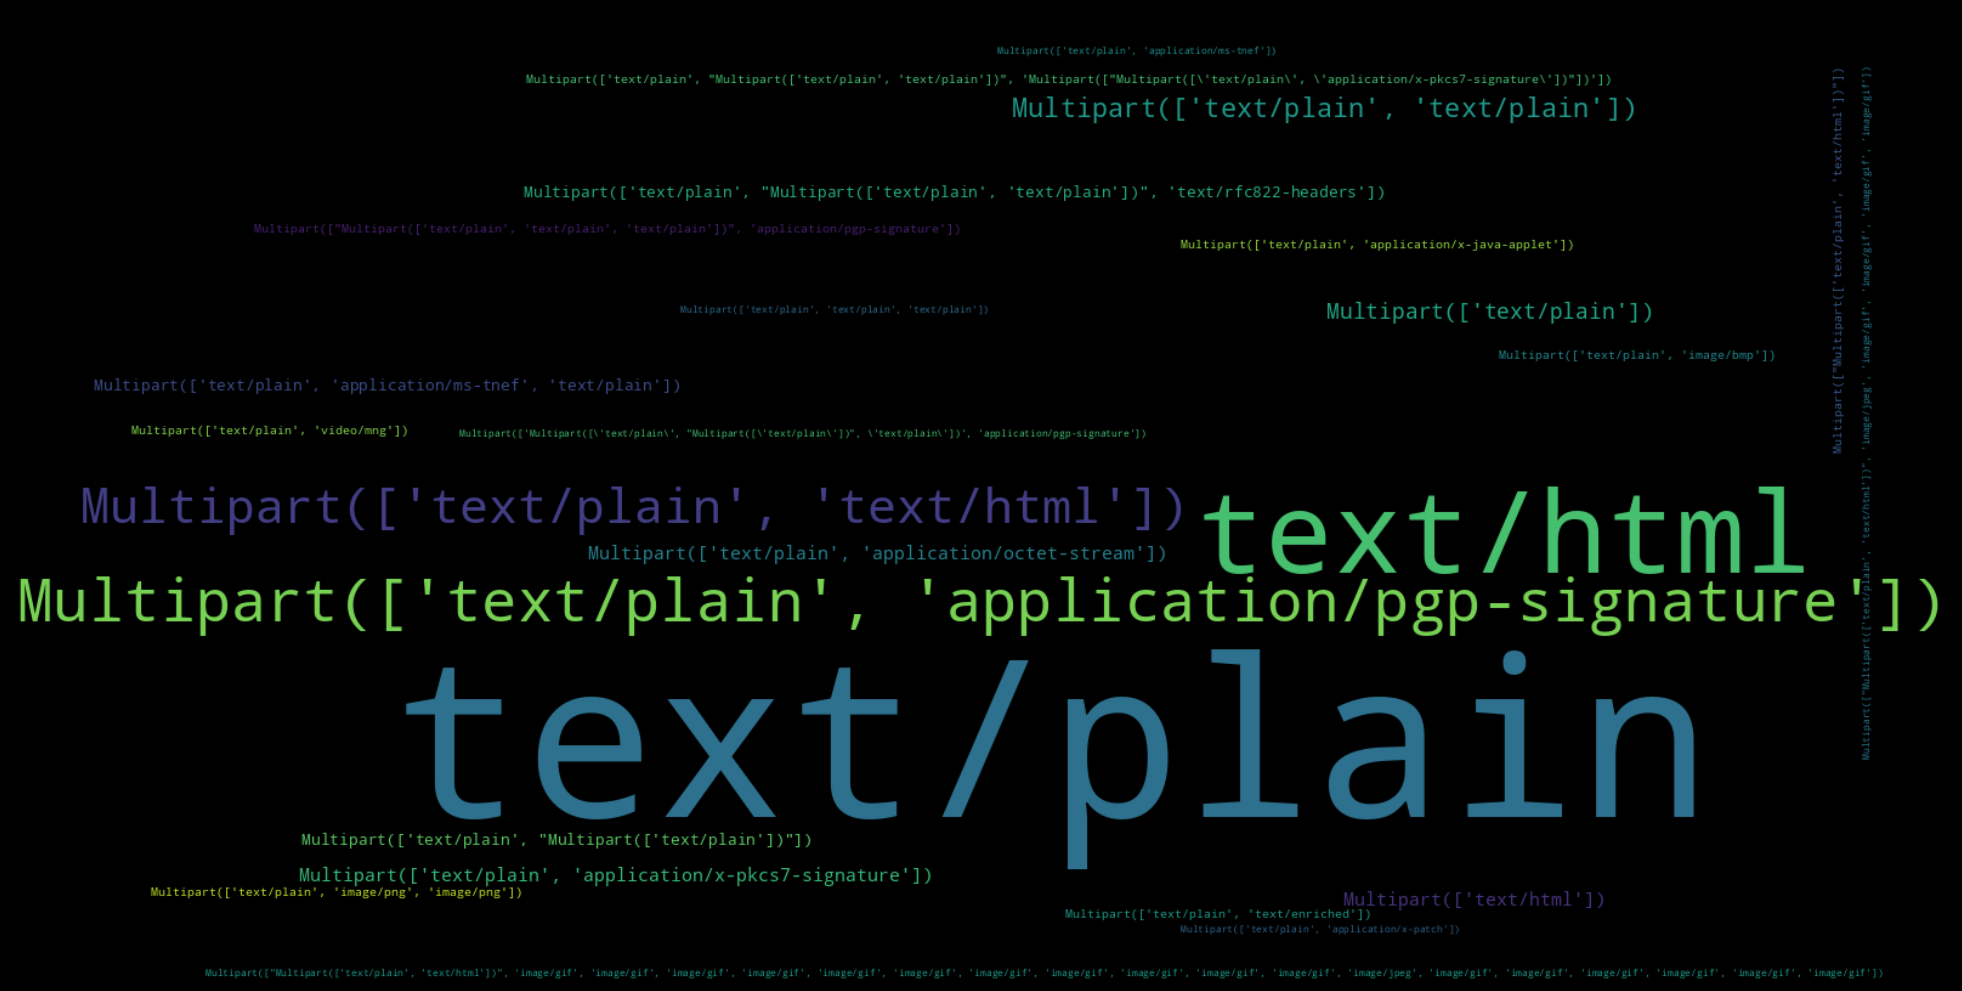

In [123]:
draw_word_cloud(hams_structs)

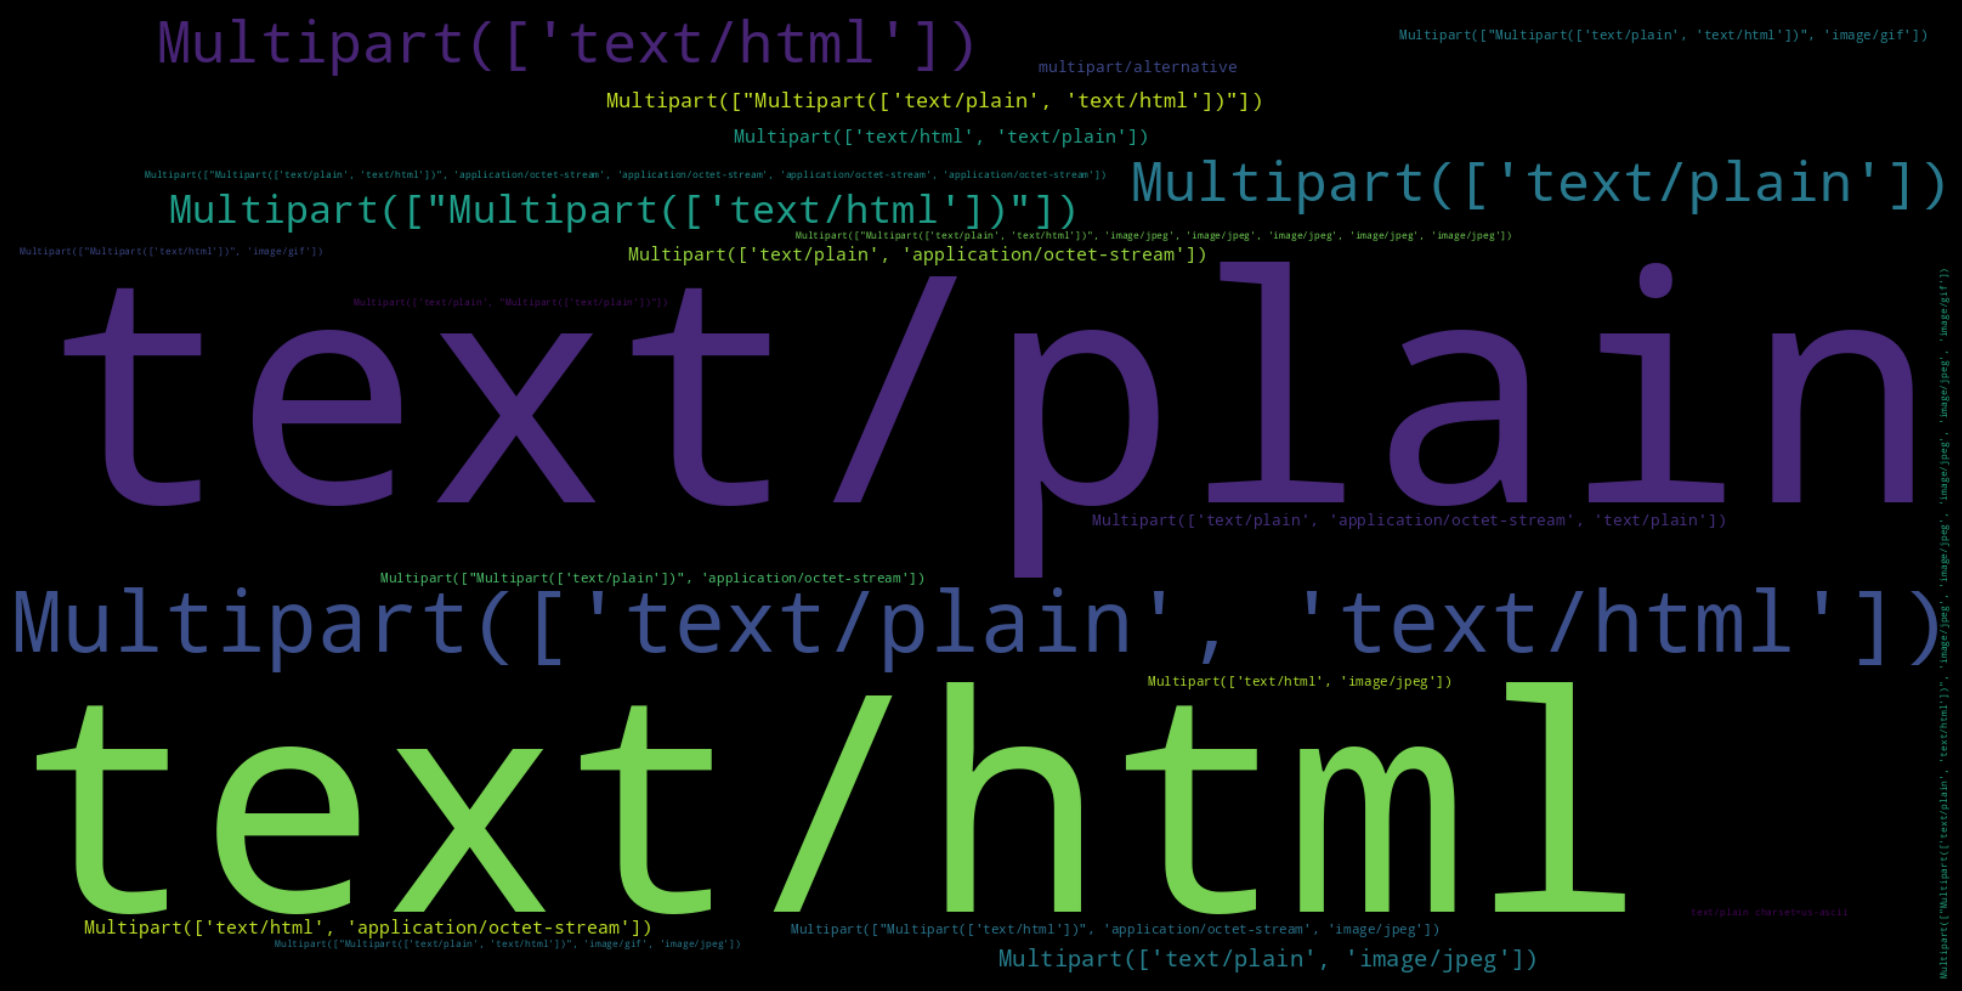

In [124]:
draw_word_cloud(spams_structs)